# Submission : Multiclass Image Classification


Membuat model sekuensial untuk mengklasifikasikan gambar gestur tangan gunting, batu, kertas (3 kelas)








In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissor.zip

--2020-11-03 15:42:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissor.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  12.4MB/s    in 42s     

2020-11-03 15:43:23 (7.33 MB/s) - ‘/tmp/rock_paper_scissor.zip’ saved [322873683/322873683]



In [40]:
import zipfile
local_zip = '/tmp/rock_paper_scissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [41]:
import os
# os.listdir('sample_data')

path = os.path.join('rockpaperscissors/rps-cv-images/')
os.listdir('rockpaperscissors/rps-cv-images/')

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    fill_mode = 'nearest',
    horizontal_flip=True,
    validation_split=0.4) #validation set 40%

In [43]:
train_set = datagen.flow_from_directory(
    path,
    target_size=(150, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_set = datagen.flow_from_directory(
    path,
    target_size=(150, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [50]:
import tensorflow as tf 

model = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(2,2), input_shape=(150,100,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [51]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(
      train_set,
      batch_size=32,
      epochs=50,
      validation_data=validation_set, # menampilkan akurasi pengujian data validasi
      verbose=2)

Epoch 1/50
42/42 - 16s - loss: 1.3034 - accuracy: 0.3775 - val_loss: 1.1244 - val_accuracy: 0.3318
Epoch 2/50
42/42 - 16s - loss: 1.0390 - accuracy: 0.4726 - val_loss: 0.9782 - val_accuracy: 0.6281
Epoch 3/50
42/42 - 16s - loss: 1.0546 - accuracy: 0.4680 - val_loss: 0.9857 - val_accuracy: 0.5618
Epoch 4/50
42/42 - 16s - loss: 0.9675 - accuracy: 0.5381 - val_loss: 0.9292 - val_accuracy: 0.6178
Epoch 5/50
42/42 - 16s - loss: 0.9594 - accuracy: 0.5578 - val_loss: 0.9498 - val_accuracy: 0.5938
Epoch 6/50
42/42 - 16s - loss: 0.9605 - accuracy: 0.5434 - val_loss: 0.9282 - val_accuracy: 0.5046
Epoch 7/50
42/42 - 16s - loss: 0.9322 - accuracy: 0.5875 - val_loss: 0.8580 - val_accuracy: 0.6442
Epoch 8/50
42/42 - 16s - loss: 0.8777 - accuracy: 0.6195 - val_loss: 0.9229 - val_accuracy: 0.5686
Epoch 9/50
42/42 - 16s - loss: 0.7867 - accuracy: 0.6591 - val_loss: 0.7293 - val_accuracy: 0.6899
Epoch 10/50
42/42 - 16s - loss: 0.8130 - accuracy: 0.6324 - val_loss: 0.7076 - val_accuracy: 0.7391
Epoch 11/

In [53]:
 # tambahkan eposchs jika akurasi model belum optimal
 model.fit(
      train_set,
      batch_size=32,
      epochs=10,
      validation_data=validation_set, # menampilkan akurasi pengujian data validasi
      verbose=2)

Epoch 1/10
42/42 - 16s - loss: 0.4157 - accuracy: 0.8539 - val_loss: 0.4370 - val_accuracy: 0.8352
Epoch 2/10
42/42 - 16s - loss: 0.4119 - accuracy: 0.8623 - val_loss: 0.4474 - val_accuracy: 0.8318
Epoch 3/10
42/42 - 16s - loss: 0.3878 - accuracy: 0.8562 - val_loss: 0.3757 - val_accuracy: 0.8581
Epoch 4/10
42/42 - 16s - loss: 0.4310 - accuracy: 0.8432 - val_loss: 0.3646 - val_accuracy: 0.8741
Epoch 5/10
42/42 - 16s - loss: 0.3807 - accuracy: 0.8653 - val_loss: 0.3781 - val_accuracy: 0.8707
Epoch 6/10
42/42 - 16s - loss: 0.3167 - accuracy: 0.8813 - val_loss: 0.3525 - val_accuracy: 0.8719
Epoch 7/10
42/42 - 16s - loss: 0.3797 - accuracy: 0.8600 - val_loss: 0.4518 - val_accuracy: 0.8547
Epoch 8/10
42/42 - 16s - loss: 0.4103 - accuracy: 0.8387 - val_loss: 0.3389 - val_accuracy: 0.8844
Epoch 9/10
42/42 - 16s - loss: 0.3322 - accuracy: 0.8836 - val_loss: 1.5141 - val_accuracy: 0.4771
Epoch 10/10
42/42 - 16s - loss: 0.3308 - accuracy: 0.8790 - val_loss: 0.2823 - val_accuracy: 0.9119


In [54]:
 # tambahkan eposchs jika akurasi model belum optimal
 model.fit(
      train_set,
      batch_size=32,
      epochs=10,
      validation_data=validation_set, # menampilkan akurasi pengujian data validasi
      verbose=2)

Epoch 1/10
42/42 - 16s - loss: 0.4514 - accuracy: 0.8272 - val_loss: 0.7385 - val_accuracy: 0.6487
Epoch 2/10
42/42 - 16s - loss: 0.4528 - accuracy: 0.8288 - val_loss: 0.3329 - val_accuracy: 0.8959
Epoch 3/10
42/42 - 16s - loss: 0.3123 - accuracy: 0.8965 - val_loss: 0.3224 - val_accuracy: 0.8822
Epoch 4/10
42/42 - 16s - loss: 0.2705 - accuracy: 0.8942 - val_loss: 0.3372 - val_accuracy: 0.8741
Epoch 5/10
42/42 - 16s - loss: 0.3192 - accuracy: 0.8775 - val_loss: 0.2934 - val_accuracy: 0.8924
Epoch 6/10
42/42 - 16s - loss: 0.2733 - accuracy: 0.9041 - val_loss: 0.4327 - val_accuracy: 0.8318
Epoch 7/10
42/42 - 16s - loss: 0.5878 - accuracy: 0.8044 - val_loss: 0.5501 - val_accuracy: 0.8307
Epoch 8/10
42/42 - 16s - loss: 0.4623 - accuracy: 0.8478 - val_loss: 0.6521 - val_accuracy: 0.7140
Epoch 9/10
42/42 - 16s - loss: 0.3473 - accuracy: 0.8866 - val_loss: 0.3745 - val_accuracy: 0.8741
Epoch 10/10
42/42 - 16s - loss: 0.3139 - accuracy: 0.8980 - val_loss: 0.3484 - val_accuracy: 0.8822


Saving oqHaBv13VeSkB6Wy.png to oqHaBv13VeSkB6Wy.png
oqHaBv13VeSkB6Wy.png
Picture below is rock hand gesture


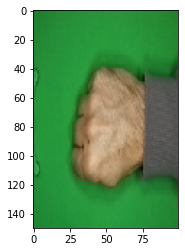

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  for code in classes:
    if code[0]==1:
      print('Picture below is paper hand gesture')
    elif code[1]==1:
      print('Picture below is rock hand gesture')
    else:
      print('Picture below is scissor hand gesture')